In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("raw_data/Zm_V4_15part.csv")
m = pd.read_csv("supplement/predict_new_photosynthesis_related_gene.csv")
df = df.rename(columns={"Unnamed: 0":"GeneID"})
del df["TF"]
del df['blade_max']
df.columns = ['GeneID', 'Zm15_p1', 'Zm15_p2', 'Zm15_p3', 'Zm15_p4', 'Zm15_p5',
       'Zm15_p6', 'Zm15_p7', 'Zm15_p8', 'Zm15_p9', 'Zm15_p10', 'Zm15_p11', 'Zm15_p12',
       'Zm15_p13', 'Zm15_p14', 'Zm15_p15']

In [3]:
df.columns = ['GeneID', 'p1', 'p2', 'p3', 'p4', 'p5',
       'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12',
       'p13', 'p14', 'p15']

In [4]:
df = m.merge(df,on="GeneID")
df.index = df["GeneID"]
del df["GeneID"]
df_a = np.array(df.values)
av = np.array(df.mean(axis=1))
std = np.array(df.std(axis=1))
L = df_a.T - av
k = L/std
arr = k.T
ddd = pd.DataFrame(arr,index=df.index)
ddd.columns = df.columns

In [5]:
#cluster 1
p5678 = ddd[ddd['p5'] + ddd['p6'] + ddd['p7'] + ddd['p8'] + ddd['p9'] + ddd['p10']  > 4]
p5678 = p5678[p5678['p5'] + p5678['p6'] > p5678['p14'] +p5678['p15']]
len(p5678)
#Zm00001d021763 LHCB
#Zm00001d046170 PEPC1
#Zm00001d011467
#Zm00001d015613 

108

In [6]:
#cluster 2
p89101234 = ddd[ddd['p8'] + ddd['p9'] + ddd['p10'] + ddd['p11'] + ddd['p12']   + ddd['p13'] + ddd['p14']  > 3]
p89101234 = p89101234[p89101234['p7'] + p89101234['p8'] < p89101234['p12'] +p89101234['p11']]
p89101234 = p89101234[p89101234['p7'] < p89101234['p14']]
len(p89101234)
#Zm00001d012088
#Zm00001d002341 chr
#Zm00001d038163 ppdk
#Zm00001d028471 ppck

416

In [7]:
#cluster 3
p1234 = ddd[ddd['p1'] + ddd['p2'] + ddd['p3'] + ddd['p4'] > 3]
p1234 = p1234[p1234['p1'] > p1234['p6']]
len(p1234)

33

In [8]:
#cluster 4
p456 = ddd[ddd['p4'] + ddd['p5'] + ddd['p6'] > 3]
p456 = p456[p456['p6'] > p456['p1']]
len(p456)
#Zm00001d003612 Tic40
#Zm00001d021716 crp1
#Zm00001d000399
#Zm00001d002500

115

In [9]:
ddd.columns = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

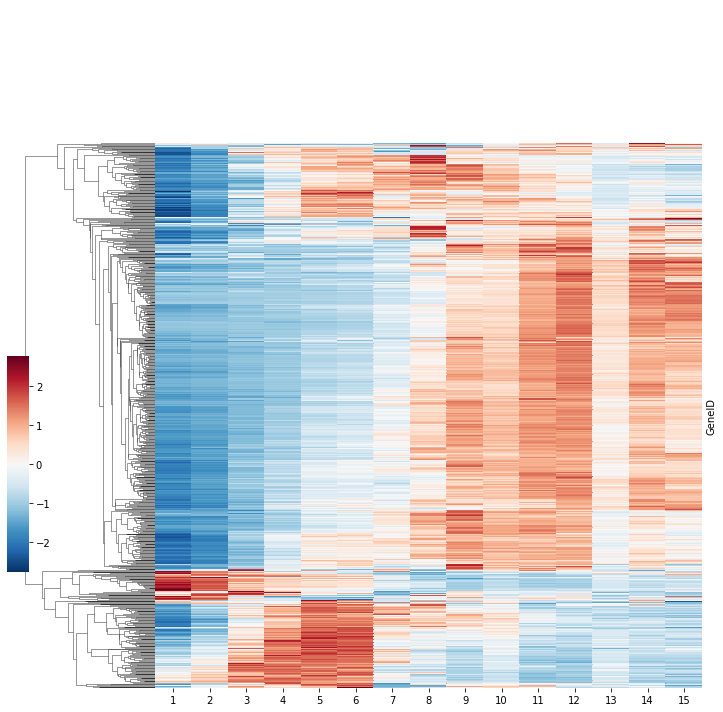

In [11]:
g = sns.clustermap(ddd,center = 0,yticklabels=False,cmap="RdBu_r",col_cluster=False,cbar_pos=(0, .2, .03, .3))

## 代表基因

In [12]:
df = pd.read_csv("raw_data/Zm_V4_15part.csv")
df = df.rename(columns={"Unnamed: 0":"GeneID"})
del df["TF"]
del df['blade_max']
df.columns = ['GeneID', 'p1', 'p2', 'p3', 'p4', 'p5',
       'p6', 'p7', 'p8', 'p9', 'p10', 'p11', 'p12',
       'p13', 'p14', 'p15']
df.index = df["GeneID"]
del df["GeneID"]

In [13]:
df = df.loc[["Zm00001d021763","Zm00001d046170","Zm00001d011467","Zm00001d034338",
                 "Zm00001d012088","Zm00001d002341","Zm00001d038163","Zm00001d028471",
                 "Zm00001d003612","Zm00001d021716","Zm00001d000399","Zm00001d002500"]]

In [14]:
df_a = np.array(df.values)
av = np.array(df.mean(axis=1))
std = np.array(df.std(axis=1))
L = df_a.T - av
k = L/std
arr = k.T
p15 = pd.DataFrame(arr,index=df.index)
p15.columns = df.columns

### Cluster1

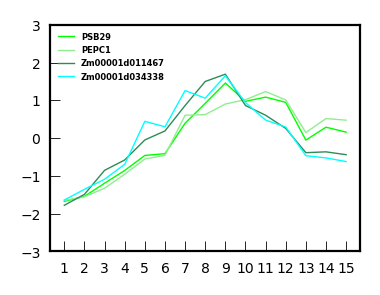

In [15]:
plt.figure(figsize=(2,1.5),dpi=200)
plt.ylim((-3, 3))
x = list(ddd.columns)
plt.tick_params(labelsize=5,width=0.3)
plt.plot(ddd.columns,p15[p15.index == "Zm00001d021763"].values.tolist()[0],'lime', linewidth=0.5, label ="PSB29")
plt.xticks(x)
plt.legend(loc='upper left',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.plot(ddd.columns,p15[p15.index == "Zm00001d046170"].values.tolist()[0],'lightgreen', linewidth=0.5, label ="PEPC1")
plt.xticks(x)
plt.legend(loc='upper left',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.plot(ddd.columns,p15[p15.index == "Zm00001d011467"].values.tolist()[0],'seagreen', linewidth=0.5, label ="Zm00001d011467")
plt.xticks(x)
plt.legend(loc='upper left',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.plot(ddd.columns,p15[p15.index == "Zm00001d034338"].values.tolist()[0],'cyan', linewidth=0.5, label ="Zm00001d034338")
plt.xticks(x)
plt.legend(loc='upper left',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.tick_params(direction='in')

### Cluster2

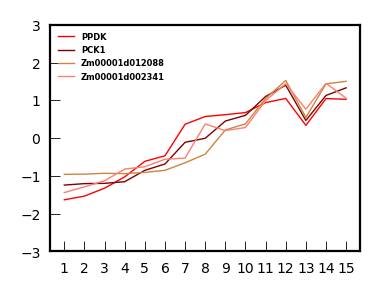

In [16]:
plt.figure(figsize=(2,1.5),dpi=200)
plt.ylim((-3, 3))
plt.tick_params(labelsize=5,width=0.3)
plt.plot(ddd.columns,p15[p15.index == "Zm00001d038163"].values.tolist()[0], linewidth=0.5, color='red', label ="PPDK")
plt.xticks(x)
plt.legend(loc='upper left',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.plot(ddd.columns,p15[p15.index == "Zm00001d028471"].values.tolist()[0], linewidth=0.5, color='maroon', label ="PCK1")
plt.xticks(x)
plt.legend(loc='upper left',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.plot(ddd.columns,p15[p15.index == "Zm00001d012088"].values.tolist()[0], linewidth=0.5, color='peru', label ="Zm00001d012088")
plt.xticks(x)
plt.legend(loc='upper left',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.plot(ddd.columns,p15[p15.index == "Zm00001d002341"].values.tolist()[0], linewidth=0.5, color='salmon', label ="Zm00001d002341")
plt.xticks(x)
plt.legend(loc='upper left',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.tick_params(direction='in')

### Cluster3

### Cluster4

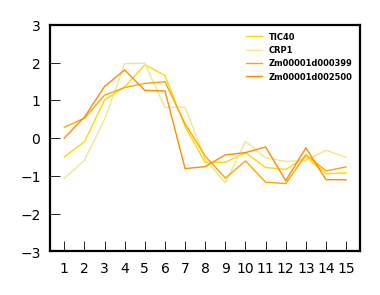

In [17]:
plt.figure(figsize=(2,1.5),dpi=200)
plt.ylim((-3, 3))
plt.tick_params(labelsize=5,width=0.3)
plt.plot(ddd.columns,p15[p15.index == "Zm00001d003612"].values.tolist()[0], linewidth=0.5, color='gold', label ="TIC40")
plt.xticks(x)
plt.legend(loc='upper right',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.plot(ddd.columns,p15[p15.index == "Zm00001d021716"].values.tolist()[0], linewidth=0.5, color='khaki', label ="CRP1")
plt.xticks(x)
plt.legend(loc='upper right',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.plot(ddd.columns,p15[p15.index == "Zm00001d000399"].values.tolist()[0], linewidth=0.5, color='orange', label ="Zm00001d000399")
plt.xticks(x)
plt.legend(loc='upper right',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.plot(ddd.columns,p15[p15.index == "Zm00001d002500"].values.tolist()[0], linewidth=0.5, color='darkorange', label ="Zm00001d002500")
plt.xticks(x)
plt.legend(loc='upper right',fontsize=3,frameon=False,prop={"size":3,'weight':"bold"})
plt.tick_params(direction='in')

##### 